### Project 2 - Retinex

#### 任务 1
在论文中随机选择两个 retinex 算法，实现并比较。

#### 任务 2
+ sigma = 16,32,64 时，比较不同高斯滤波的性能
+ 1) 读取并对图像进行二维高斯滤波：
    - input image - X; 高斯滤波后的图片结果 - Y; 令 Z = X/Y 
    - 求 Z 的均值和 sigma
    - 扩展到 [0,255] 范围并输出图像
+ 2) 读取并对图像进行二维高斯滤波：
    - input image - X; 高斯滤波后的图片结果 - Y; 令 Z = logX - logY
    - 求 Z 的均值和 sigma
    - 扩展到 [0,255] 范围并输出图像

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show_res(img, name):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hist, bins = np.histogram(img.flatten(), 256)
    pdf = hist / np.prod(img.shape)
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.plot(pdf, color='r')
    plt.title(name)
    plt.xlim([0, 256])
    plt.ylim([0, pdf.max()+0.005])
    plt.subplot(2, 2, 2)
    plt.imshow(img, cmap="gray")

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# plot result
def plot_res(img, img_eq, name1, name2):

    # plotting for orignal image 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hist, bins = np.histogram(img.flatten(), 256)
    pdf = hist / np.prod(img.shape)
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.plot(pdf, color='r')
    plt.title(name1)
    plt.xlim([0, 256])
    plt.ylim([0, pdf.max()+0.005])
    plt.subplot(2, 2, 2)
    plt.imshow(img, cmap="gray")

    # plotting for equalizated image
    img_eq =  cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB)
    hist2, bin2 = np.histogram(img_eq, 256)
    pdf2 = hist2 / np.prod(img.shape)
    plt.subplot(2, 2, 3)
    plt.plot(pdf2, color='r')
    plt.title(name2)
    plt.xlim([0, 256])
    plt.ylim([0, pdf2.max()+0.005])    
    plt.subplot(2, 2, 4)   
    plt.imshow(img_eq, cmap="gray")


# plot hist of a image
def plot_hist(img):
    
    plt.hist(img.flatten(), 256)

### Different SSR method

In [4]:
def SSR(img, sigma):
    
    temp = cv2.GaussianBlur(img, (0,0), sigma)
    gaussian = np.where(temp==0, 0.01, temp)
    retinex = np.log10(img+0.01) - np.log10(gaussian)
    
    # 0-255
    for i in range(retinex.shape[2]):
        retinex[:,:,i] = (retinex[:,:,i] - np.min(retinex[:,:,i])) / (np.max(retinex[:,:,i]) - np.min(retinex[:,:,i])) * 255
        
    img_ssr = np.uint8(np.minimum(np.maximum(retinex, 0), 255))
    
    return img_ssr

In [5]:
def compare_SSR(img, sigma1, sigma2, sigma3):
    
    show_res(img, "original")
    
    img_ssr_1 = SSR(img, sigma1)
    cv2.imwrite('./result/SSR_r{}_sigma{}.jpg'.format(np.random.randint(0, 100), sigma1), img_ssr_1)
    show_res(img_ssr_1, "sigma={}".format(sigma1))
    
    img_ssr_2 = SSR(img, sigma2)
    cv2.imwrite('./result/SSR_r{}_sigma{}.jpg'.format(np.random.randint(0, 100), sigma2), img_ssr_2)
    show_res(img_ssr_2, "sigma={}".format(sigma2))
    
    img_ssr_3 = SSR(img, sigma3)
    cv2.imwrite('./result/SSR_r{}_sigma{}.jpg'.format(np.random.randint(0, 100), sigma3), img_ssr_3)
    show_res(img_ssr_3, "sigma={}".format(sigma3))    

In [6]:
#img1 = cv2.imread("./cloud.jpg") 
img1 = cv2.imread("./img2/(92).jpg") 
img2 = cv2.imread("./snow.jpg") 

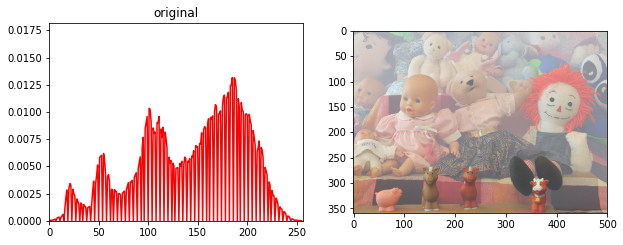

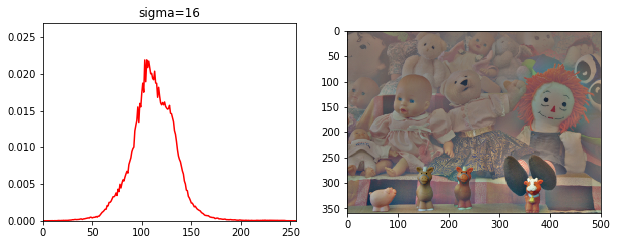

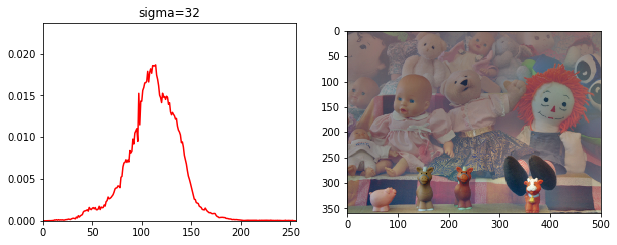

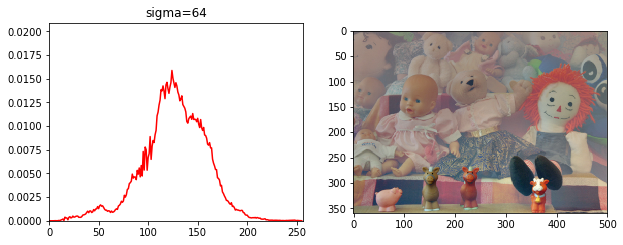

In [7]:
compare_SSR(img1, 16, 32, 64)

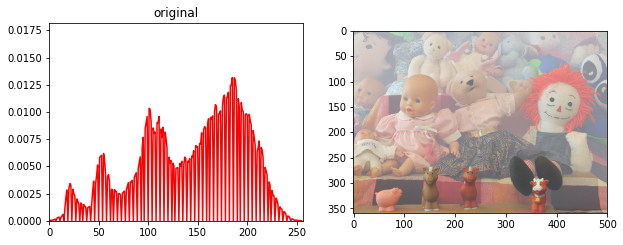

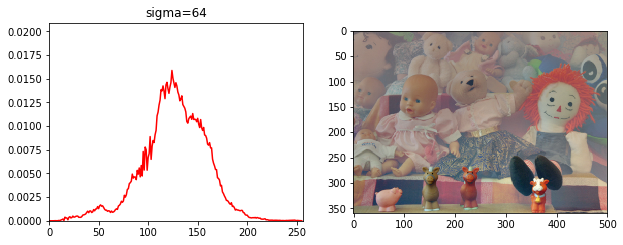

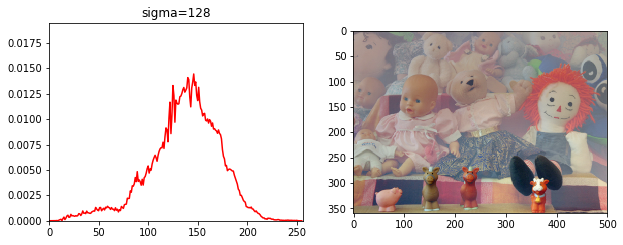

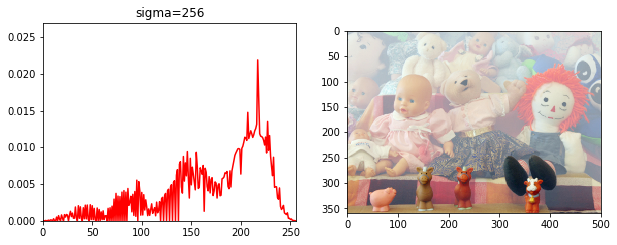

In [8]:
compare_SSR(img1, 64, 128, 256)

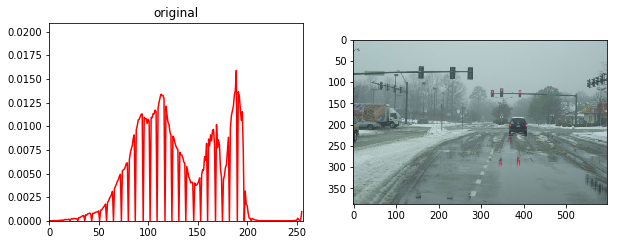

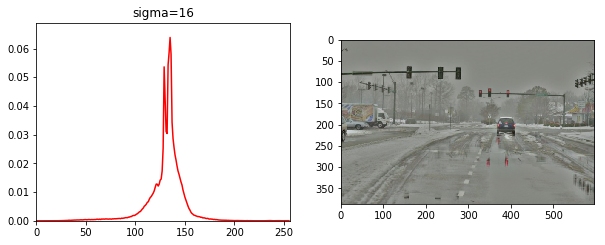

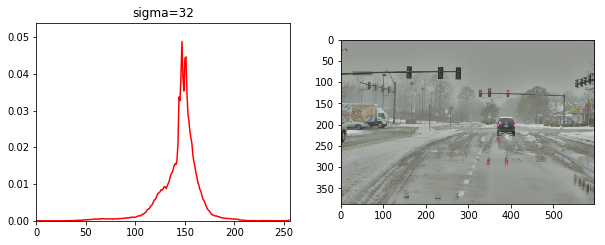

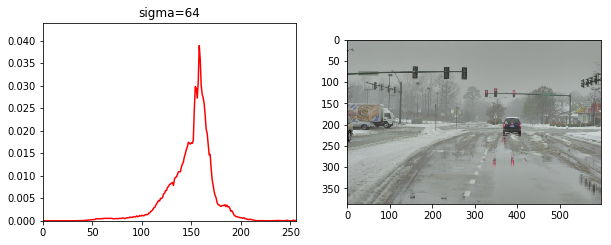

In [9]:
compare_SSR(img2, 16, 32, 64)

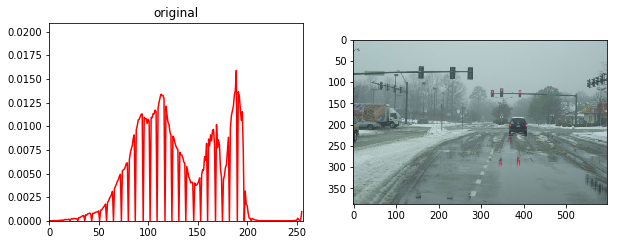

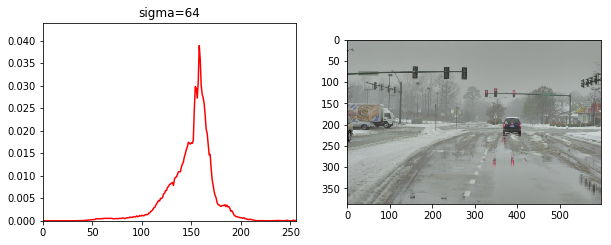

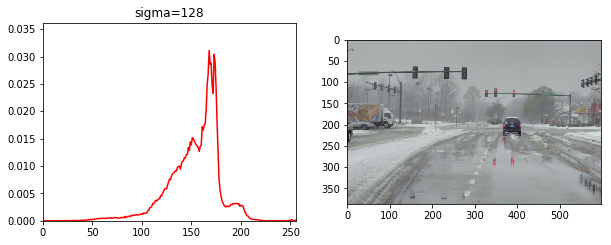

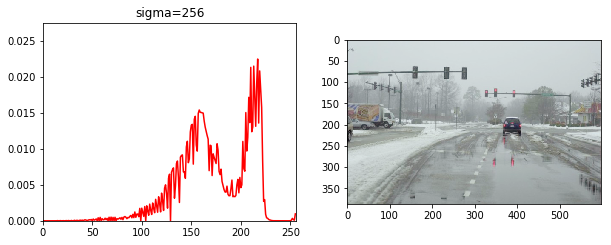

In [10]:
compare_SSR(img2, 64, 128, 256)

In [11]:
def SSR_DIV(img, sigma):
    
    temp = cv2.GaussianBlur(img, (0,0), sigma)
    gaussian = np.where(temp==0, 0.01, temp) # 让为 0 的值变为 0.01
    retinex = img/gaussian
    
    ret_mean = np.mean(retinex)
    ret_std = np.std(retinex)
    print("Mean: ", ret_mean)
    print("STD: ", ret_std)
    
    low = ret_mean - 2*ret_std
    high = ret_mean + 2*ret_std
    
    maxi = np.max(retinex)
    mini = np.min(retinex)
    
    # 0-255
    flat_di = retinex.flatten()
    for i in range(len(flat_di)):
        if (flat_di[i] >= low) and (flat_di[i] <=high):
            flat_di[i] = ((flat_di[i] - mini) / ( maxi - mini)) * 255
        elif flat_di[i] < low:
            flat_di[i] = ((low - mini) / ( maxi - mini)) * 255
        elif flat_di[i] > high:
            flat_di[i] = ((high - mini) / ( maxi - mini)) * 255
    
    new_img = np.reshape(flat_di, img.shape)
    img_ssr_div = np.uint8(np.minimum(np.maximum(new_img, 0), 255))
    
    return img_ssr_div

In [12]:
def compare_SSR_DIV(img, sigma1, sigma2, sigma3):
    
    show_res(img, "original")
    
    img_ssr_1 = SSR_DIV(img, sigma1)
    cv2.imwrite('./result/SSR-DIV/SSR_DIV_r{}_sigma{}.jpg'.format(np.random.randint(0, 100), sigma1), img_ssr_1)
    show_res(img_ssr_1, "sigma={}".format(sigma1))
    
    img_ssr_2 = SSR_DIV(img, sigma2)
    cv2.imwrite('./result/SSR-DIV/SSR_DIV_r{}_sigma{}.jpg'.format(np.random.randint(0, 100), sigma2), img_ssr_2)
    show_res(img_ssr_2, "sigma={}".format(sigma2))
    
    img_ssr_3 = SSR_DIV(img, sigma3)
    cv2.imwrite('./result/SSR-DIV/SSR_DIV_r{}_sigma{}.jpg'.format(np.random.randint(0, 100), sigma3), img_ssr_3)
    show_res(img_ssr_3, "sigma={}".format(sigma3))    

Mean:  1.0450697742898227
STD:  0.12332587775675917
Mean:  1.07033964008517
STD:  0.15247182625815361
Mean:  1.131905023942001
STD:  0.1769020187555089


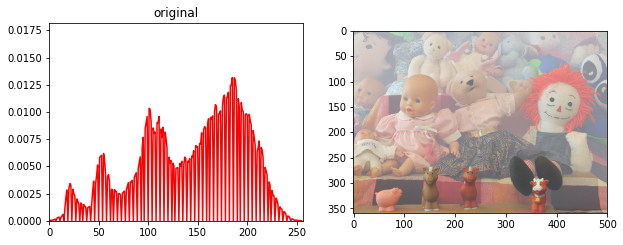

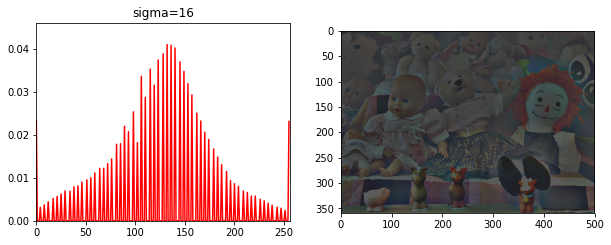

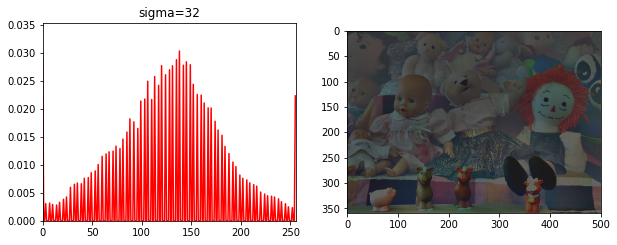

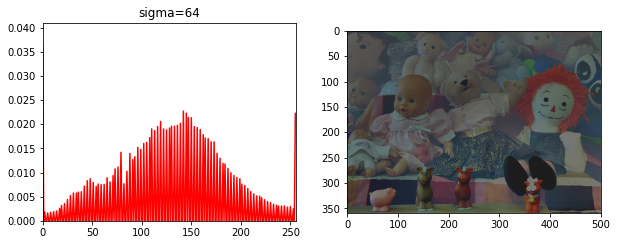

In [13]:
compare_SSR_DIV(img1, 16, 32, 64)

Mean:  1.131905023942001
STD:  0.1769020187555089
Mean:  1.0512631301053668
STD:  0.18107647625026194
Mean:  16301.992037037036
STD:  3994.324206310972


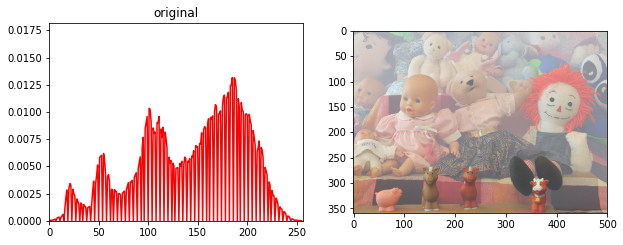

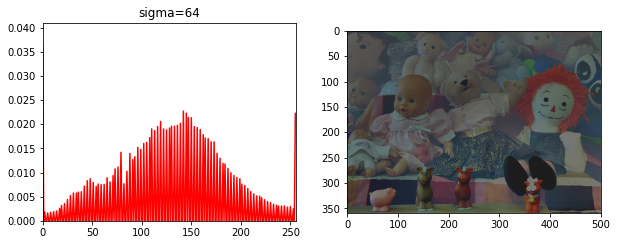

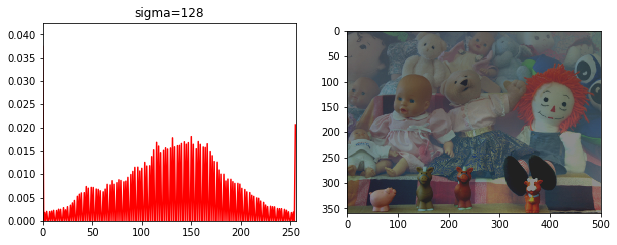

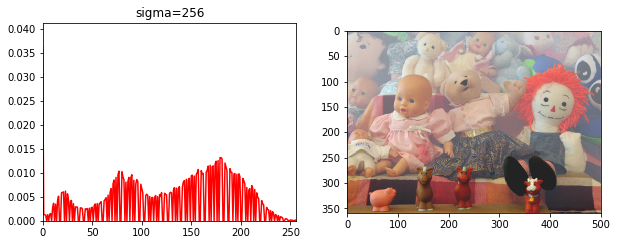

In [14]:
compare_SSR_DIV(img1, 64, 128, 256)

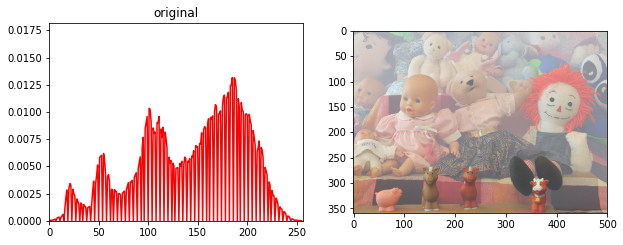

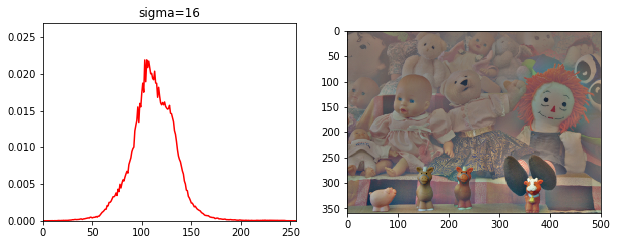

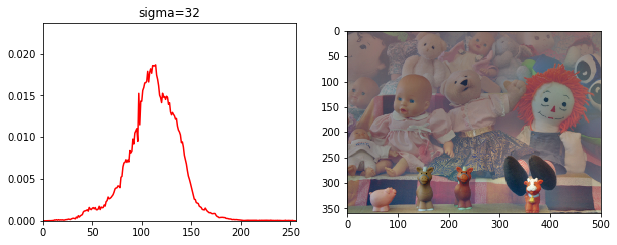

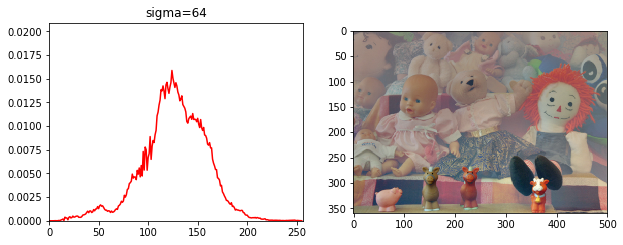

In [52]:
compare_SSR_DIV(img2, 16, 32, 64)

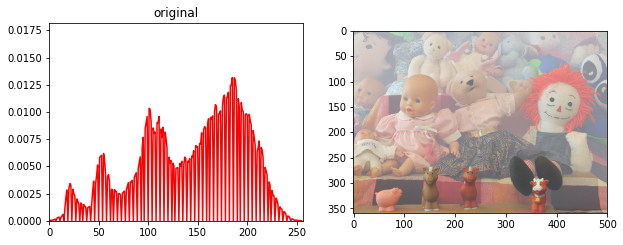

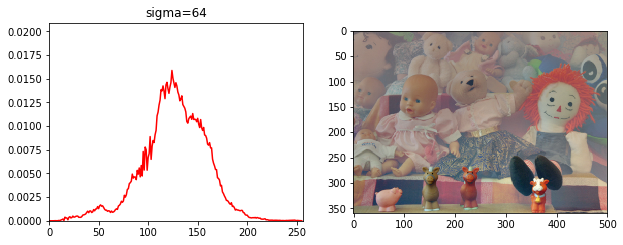

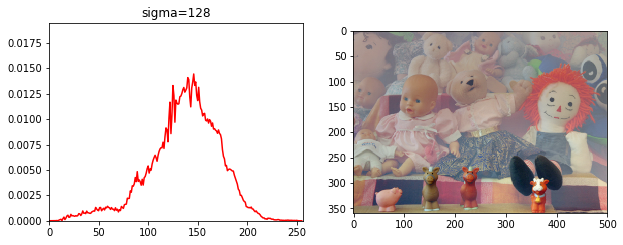

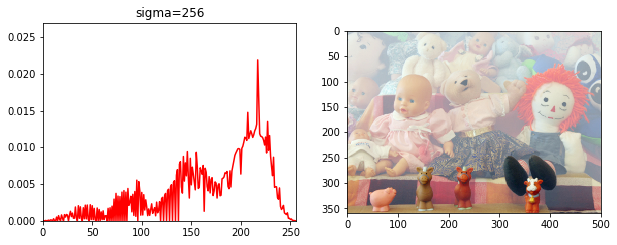

In [53]:
compare_SSR_DIV(img2, 64, 128, 256)

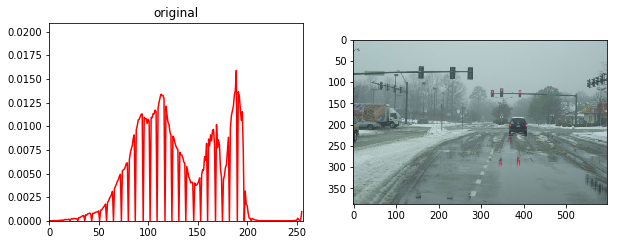

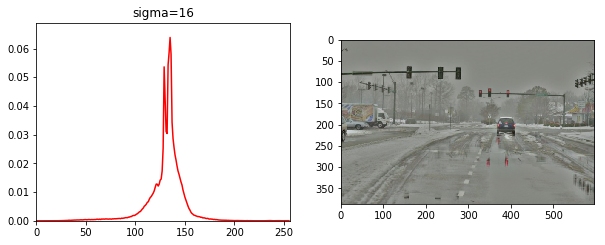

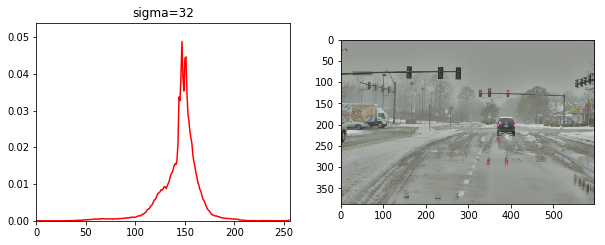

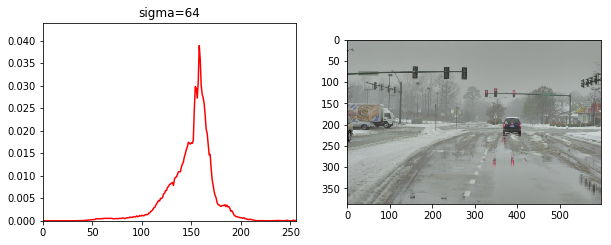

In [54]:
compare_SSR_DIV(img3, 16, 32, 64)

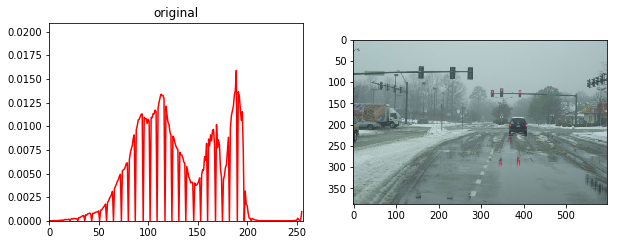

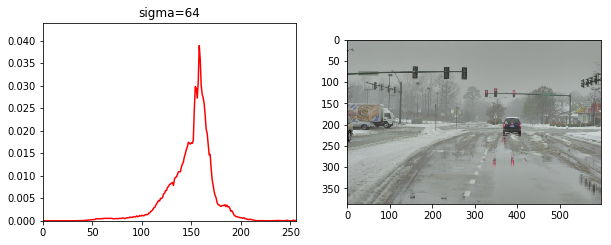

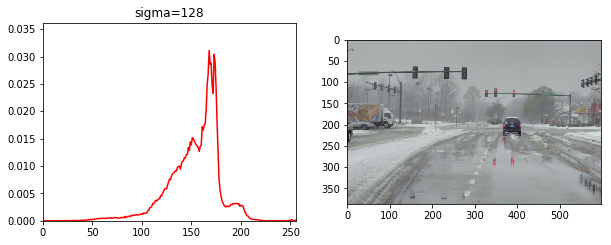

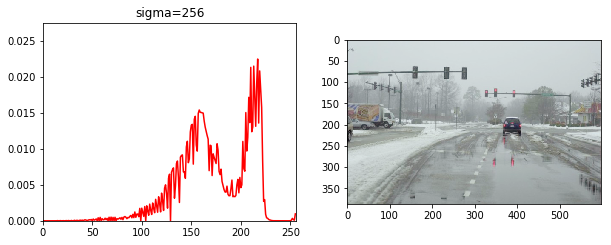

In [55]:
compare_SSR_DIV(img3, 64, 128, 256)

In [15]:
def SSR_LOG(img, sigma):
    
    temp = cv2.GaussianBlur(img, (0,0), sigma)
    gaussian = np.where(temp==0, 0.01, temp)
    retinex = np.log10(img+0.001) - np.log10(gaussian)
    
    ret_mean = np.mean(retinex)
    ret_std = np.std(retinex)
    print("Mean: ", ret_mean)
    print("STD: ", ret_std)
    
    low = ret_mean - 2*ret_std
    high = ret_mean + 2*ret_std
    
    maxi = np.max(retinex)
    mini = np.min(retinex)    
    
    # 0-255
    flat = retinex.flatten()
    for i in range(len(flat)):
        if (flat[i] >= low) and (flat[i] <=high):
            flat[i] = ((flat[i] - mini) / (maxi - mini)) * 255
        elif flat[i] < low:
            flat[i] = ((low - mini) / ( maxi - mini)) * 255
        elif flat[i] > high:
            flat[i] = ((high - mini) / ( maxi - mini)) * 255

    new_img = np.reshape(flat, img.shape)
    img_ssr_log = np.uint8(np.minimum(np.maximum(new_img, 0), 255))

    return img_ssr_log

In [16]:
def compare_SSR_LOG(img, sigma1, sigma2, sigma3):
    
    show_res(img, "original")
    
    img_ssr_1 = SSR_LOG(img, sigma1)
    cv2.imwrite('./result/SSR-LOG/SSR_LOG_r{}_sigma{}.jpg'.format(np.random.randint(0, 100), sigma1), img_ssr_1)
    show_res(img_ssr_1, "sigma={}".format(sigma1))
    
    img_ssr_2 = SSR_LOG(img, sigma2)
    cv2.imwrite('./result/SSR-LOG/SSR_LOG_r{}_sigma{}.jpg'.format(np.random.randint(0, 100), sigma2), img_ssr_2)
    show_res(img_ssr_2, "sigma={}".format(sigma2))
    
    img_ssr_3 = SSR_LOG(img, sigma3)
    cv2.imwrite('./result/SSR-LOG/SSR_LOG_r{}_sigma{}.jpg'.format(np.random.randint(0, 100), sigma3), img_ssr_3)
    show_res(img_ssr_3, "sigma={}".format(sigma3))    

Mean:  0.016210941841517022
STD:  0.05047165141018124
Mean:  0.025126221087349496
STD:  0.06219126121294109
Mean:  0.04824205018378665
STD:  0.0707879061983182


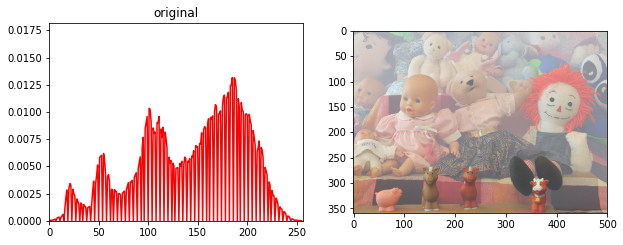

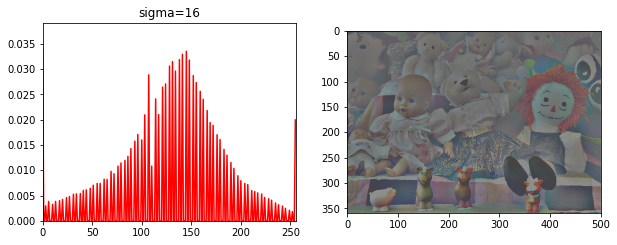

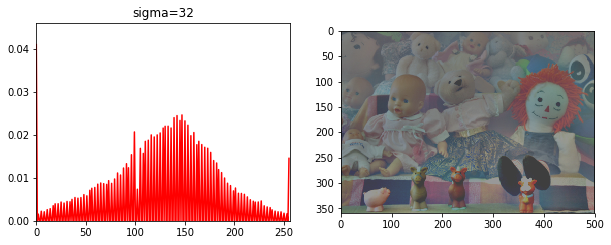

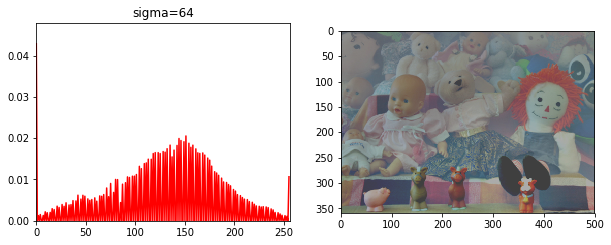

In [18]:
compare_SSR_LOG(img1, 16, 32, 64)

Mean:  0.04824205018378665
STD:  0.0707879061983182
Mean:  0.014762877355235623
STD:  0.07962610028920651
Mean:  4.196937372090435
STD:  0.12064924876844453


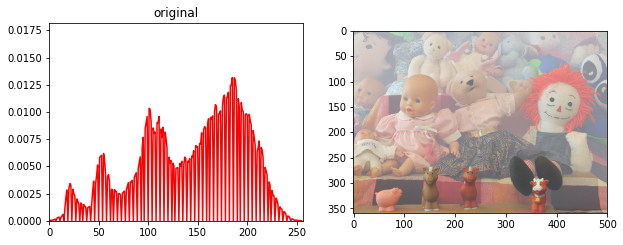

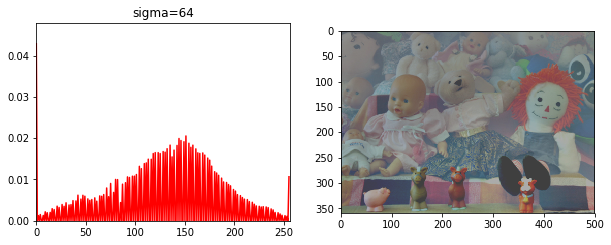

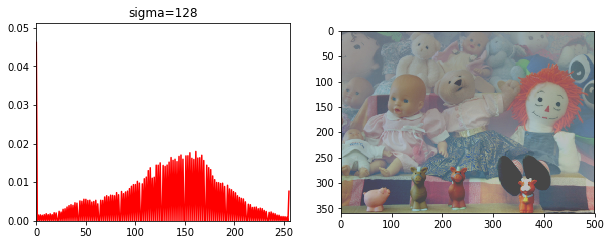

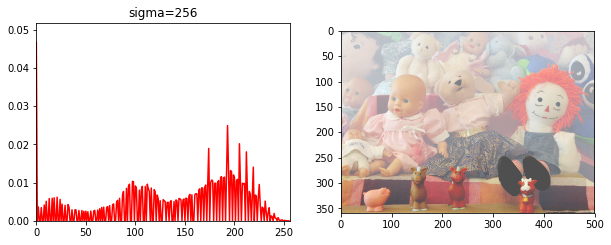

In [19]:
compare_SSR_LOG(img1, 64, 128, 256)

Mean:  0.016210941841517022
STD:  0.05047165141018124
Mean:  0.025126221087349496
STD:  0.06219126121294109
Mean:  0.04824205018378665
STD:  0.0707879061983182


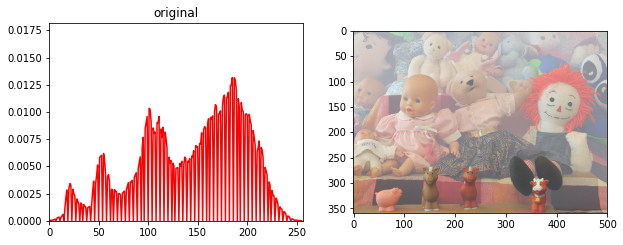

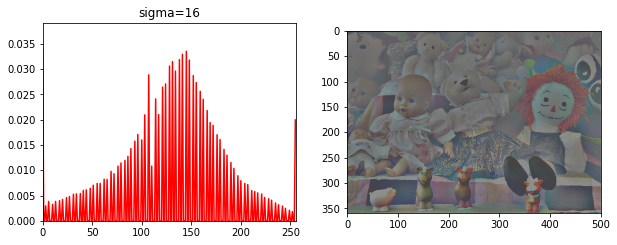

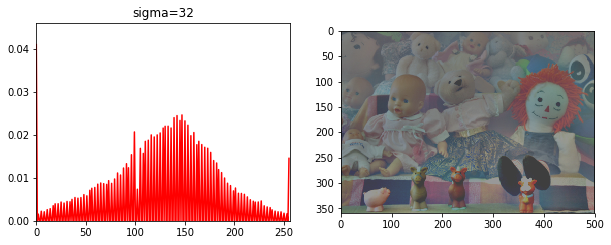

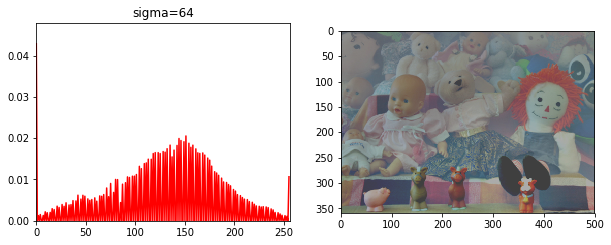

In [33]:
compare_SSR_LOG(img2, 16, 32, 64)

Mean:  0.04781238656732078
STD:  0.07674980553298535
Mean:  0.014675665868298401
STD:  0.08631993580029602
Mean:  4.153016759027644
STD:  0.11087839776141573


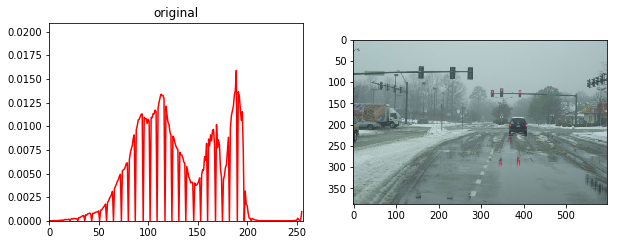

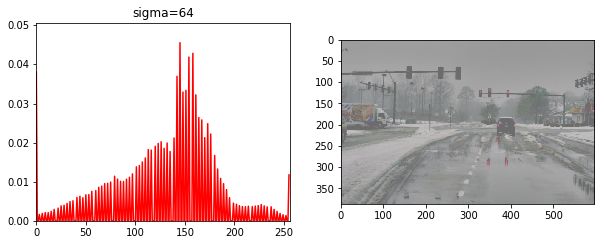

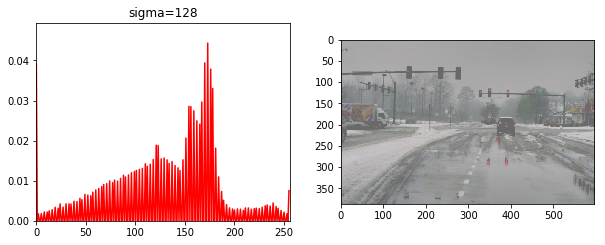

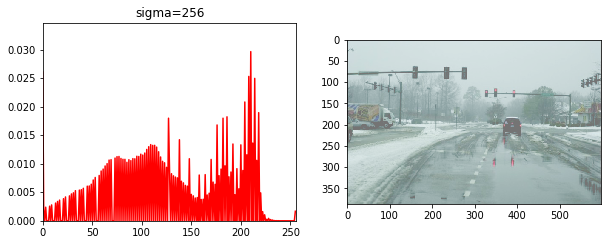

In [32]:
compare_SSR_LOG(img2, 64, 128, 256)

Mean:  0.01578568458257907
STD:  0.05889345246870553
Mean:  0.02467016135595933
STD:  0.06792918584025054
Mean:  0.04781238656732078
STD:  0.07674980553298535


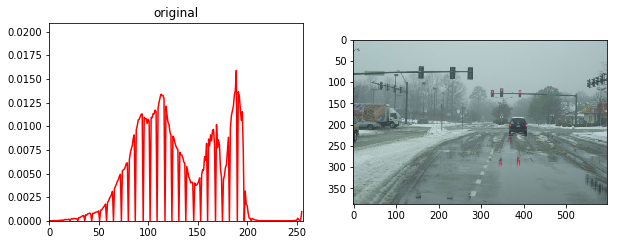

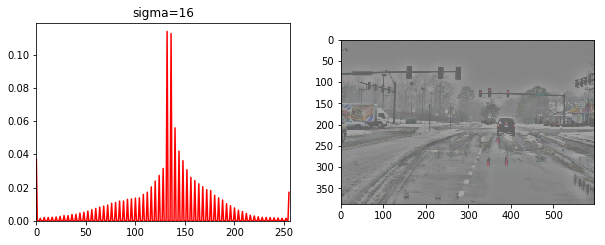

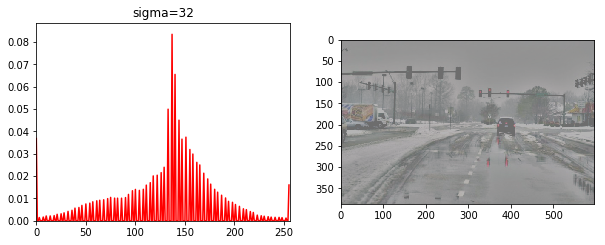

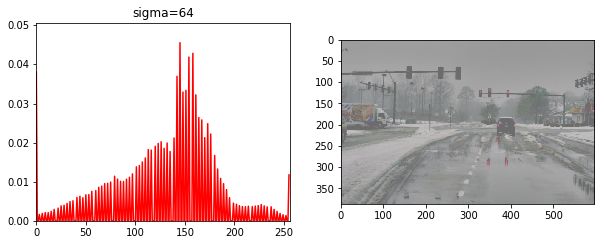

In [35]:
compare_SSR_LOG(img3, 16, 32, 64)

Mean:  0.04781238656732078
STD:  0.07674980553298535
Mean:  0.014675665868298401
STD:  0.08631993580029602
Mean:  4.153016759027644
STD:  0.11087839776141573


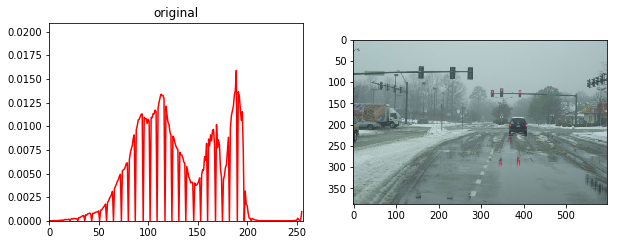

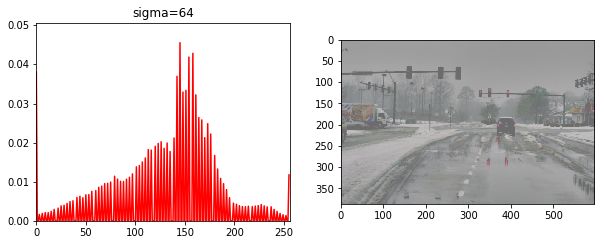

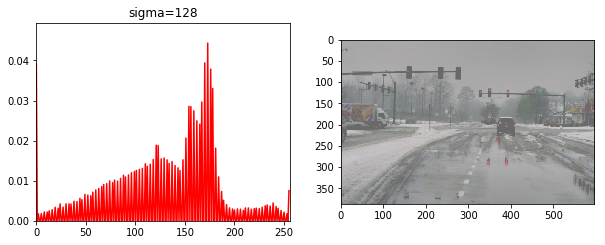

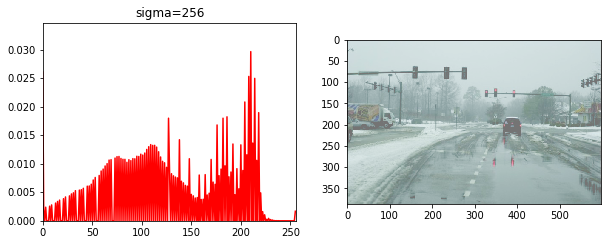

In [37]:
compare_SSR_LOG(img3, 64, 128, 256)

### Differet MSR method

In [22]:
def MSR(img, sigma_list):
    
    retinex = np.zeros_like(img*1.0)
    for sigma in sigma_list:
        retinex += SSR(img, sigma)
    
    img_msr = retinex / len(sigma_list)
    
    # 0-255
    for i in range(img_msr.shape[2]):
        img_msr[:,:,i] = (img_msr[:,:,i] - np.min(img_msr[:,:,i])) / (np.max(img_msr[:,:,i]) - np.min(img_msr[:,:,i])) * 255
        
    img_msr = np.uint8(np.minimum(np.maximum(img_msr, 0), 255))   
    
    return img_msr

In [52]:
def singleScaleRetinex(img, sigma):

    retinex = np.log10(img) - np.log10(cv2.GaussianBlur(img, (0, 0), sigma))

    return retinex

def multiScaleRetinex(img, sigma_list):

    retinex = np.zeros_like(img)
    for sigma in sigma_list:
        retinex += singleScaleRetinex(img, sigma)

    retinex = retinex / len(sigma_list)

    return retinex

def colorRestoration(img, alpha, beta):

    img_sum = np.sum(img, axis=2, keepdims=True)

    color_restoration = beta * (np.log10(alpha * img) - np.log10(img_sum))

    return color_restoration

def simplestColorBalance(img, low_clip, high_clip):    

    total = img.shape[0] * img.shape[1]
    for i in range(img.shape[2]):
        unique, counts = np.unique(img[:, :, i], return_counts=True)
        current = 0
        for u, c in zip(unique, counts):            
            if float(current) / total < low_clip:
                low_val = u
            if float(current) / total < high_clip:
                high_val = u
            current += c
                
        img[:, :, i] = np.maximum(np.minimum(img[:, :, i], high_val), low_val)

    return img    

def MSRCR(img, sigma_list, G, b, alpha, beta, low_clip, high_clip):
    
    img = np.float64(img) + 1.0
    
    img_retinex = multiScaleRetinex(img, sigma_list)
    img_color = colorRestoration(img, alpha, beta)
    img_msrcr = G * (img_retinex * img_color + b)
    
    for i in range(img_msrcr.shape[2]):
        img_msrcr[:,:,i] = (img_msrcr[:,:,i] - np.min(img_msrcr[:,:,i])) / (np.max(img_msrcr[:,:,i]) - np.min(img_msrcr[:,:,i]))*255
    
    img_msrcr = np.uint8(np.minimum(np.maximum(img_msrcr, 0), 255))
    #img_msrcr = simplestColorBalance(img_msrcr, low_clip, high_clip)
    
    return img_msrcr

def automatedMSRCR(img, sigma_list):

    img = np.float64(img) + 1.0

    img_retinex = multiScaleRetinex(img, sigma_list)

    for i in range(img_retinex.shape[2]):
        unique, count = np.unique(np.int32(img_retinex[:, :, i] * 100), return_counts=True)
        for u, c in zip(unique, count):
            if u == 0:
                zero_count = c
                break
            
        low_val = unique[0] / 100.0
        high_val = unique[-1] / 100.0
        for u, c in zip(unique, count):
            if u < 0 and c < zero_count * 0.1:
                low_val = u / 100.0
            if u > 0 and c < zero_count * 0.1:
                high_val = u / 100.0
                break
            
        img_retinex[:,:,i] = np.maximum(np.minimum(img_retinex[:,:,i], high_val), low_val)
        
        img_retinex[:,:,i] = (img_retinex[:,:,i] - np.min(img_retinex[:,:,i])) / (np.max(img_retinex[:,:,i]) - np.min(img_retinex[:,:,i]))* 255

    img_retinex = np.uint8(img_retinex)
        
    return img_retinex

def MSRCP(img, sigma_list, low_clip, high_clip):

    img = np.float64(img) + 1.0

    intensity = np.sum(img, axis=2) / img.shape[2]    

    retinex = multiScaleRetinex(intensity, sigma_list)

    intensity = np.expand_dims(intensity, 2)
    retinex = np.expand_dims(retinex, 2)

    intensity1 = simplestColorBalance(retinex, low_clip, high_clip)

    intensity1 = (intensity1 - np.min(intensity1)) / \
                 (np.max(intensity1) - np.min(intensity1)) * \
                 255.0 + 1.0

    img_msrcp = np.zeros_like(img)
    
    for y in range(img_msrcp.shape[0]):
        for x in range(img_msrcp.shape[1]):
            B = np.max(img[y, x])
            A = np.minimum(256.0 / B, intensity1[y, x, 0] / intensity[y, x, 0])
            img_msrcp[y, x, 0] = A * img[y, x, 0]
            img_msrcp[y, x, 1] = A * img[y, x, 1]
            img_msrcp[y, x, 2] = A * img[y, x, 2]

    img_msrcp = np.uint8(img_msrcp - 1.0)

    return img_msrcp

In [109]:
img1_msr = MSR(img1, [16, 32, 64])
cv2.imwrite('./result/MSR/MSR_r{}_{}.jpg'.format(np.random.randint(0, 100), "16-32-64"), img1_msr)

True

In [110]:
img1_msrcr = MSRCR(img1, [16, 32, 64], G=5, b=25, alpha=125, beta=46, low_clip=0.01, high_clip=0.99)
cv2.imwrite('./result/MSR/MSRCR_r{}_{}.jpg'.format(np.random.randint(0, 100), "16-32-64"), img1_msrcr)

True

In [111]:
#img1_auto = automatedMSRCR(img2, [32, 64, 128])

In [112]:
#img1_msrcp = MSRCP(img1, [32, 64, 128], 0.01, 0.99)

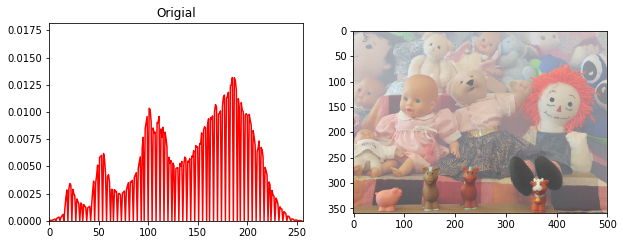

In [113]:
show_res(img1, "Origial")

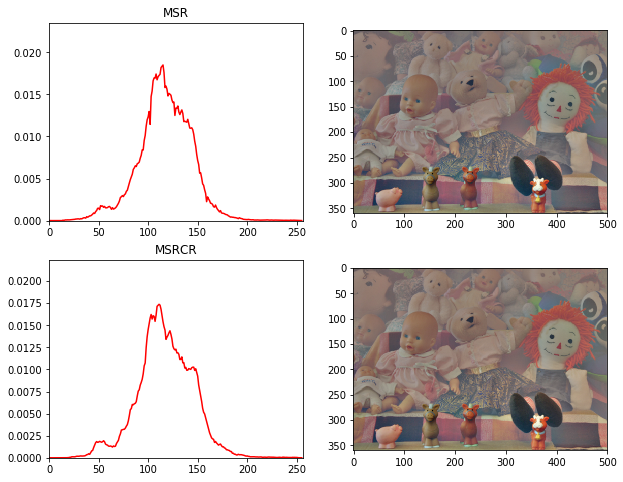

In [114]:
plot_res(img1_msr, img1_msrcr, "MSR", "MSRCR")

In [115]:
img1_msr = MSR(img1, [64, 128, 256])
cv2.imwrite('./result/MSR/MSR_r{}_{}.jpg'.format(np.random.randint(0, 100), "64-128-256"), img1_msr)

True

In [116]:
img1_msrcr = MSRCR(img1, [64, 128, 256], G=5, b=25, alpha=125, beta=46, low_clip=0.01, high_clip=0.99)
cv2.imwrite('./result/MSR/MSRCR_r{}_{}.jpg'.format(np.random.randint(0, 100), "64-128-256"), img1_msrcr)

True

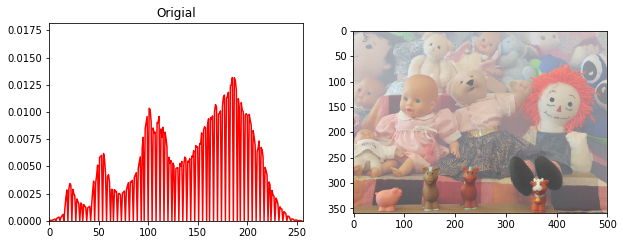

In [117]:
show_res(img1, "Origial")

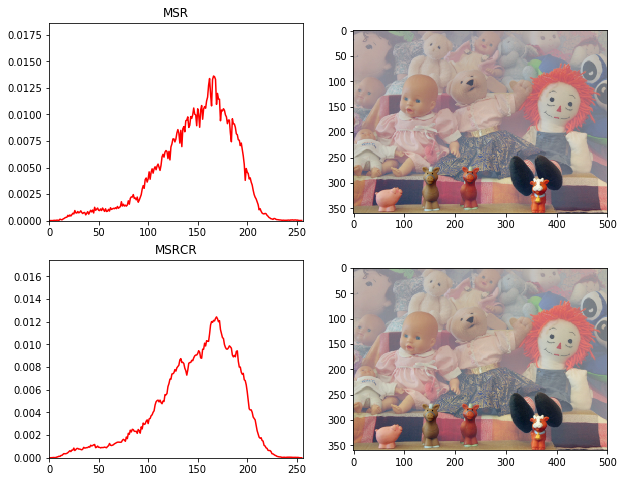

In [118]:
plot_res(img1_msr, img1_msrcr, "MSR", "MSRCR")

In [119]:
img1_msr = MSR(img1, [16, 64, 256])
cv2.imwrite('./result/MSR/MSR_r{}_{}.jpg'.format(np.random.randint(0, 100), "16-64-256"), img1_msr)

True

In [120]:
img1_msrcr = MSRCR(img1, [16, 64, 256], G=5, b=25, alpha=125, beta=46, low_clip=0.01, high_clip=0.99)
cv2.imwrite('./result/MSR/MSRCR_r{}_{}.jpg'.format(np.random.randint(0, 100), "16-64-256"), img1_msrcr)

True

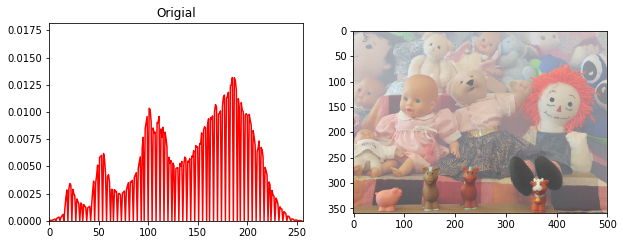

In [121]:
show_res(img1, "Origial")

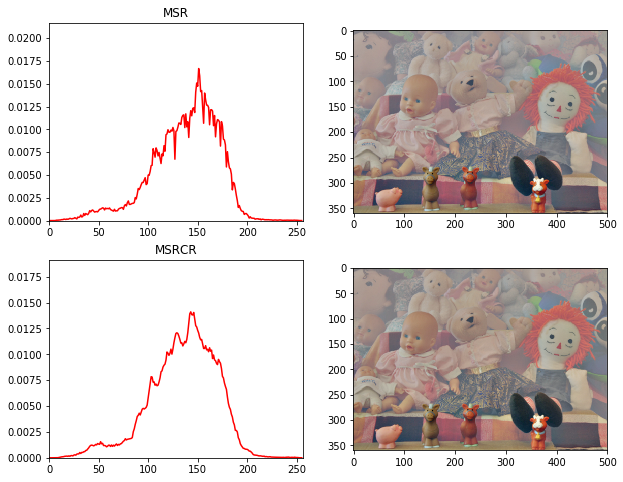

In [122]:
plot_res(img1_msr, img1_msrcr, "MSR", "MSRCR")

In [91]:
#plot_res(img1_auto, img1_msrcp, "auto-MSRCR", "MSRCP")

In [75]:
#plot_res(img2, img1_msrcp, "Original", "MSRCP")